In [1]:
from scipy.stats import norm
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# generate some data
N = 10000
x = np.random.normal(size=(N,1))
c = np.random.normal(size=5)
y = c[0] + c[1]*x + c[2]*x**2 + c[3] * x**3 + 5 * np.random.normal(size=(N,1)) * (5+x)

# sort the data?
# x, y = zip(*sorted((zip(x.flatten(),y.flatten()))))
# x = np.array(x).reshape(-1,1)
# y = np.array(y).reshape(-1,1)

In [53]:
# set up the grid over which we want to compute the 
m = 100
n = 100
y_ = np.linspace(min(y),max(y),m).reshape(1,-1)
x_ = np.linspace(min(x),max(x),n).reshape(1,-1)

# silverman rule of thumb for optimal bandwidth selection
sigma_x = 1.06 * np.std(x) * N ** -0.2
sigma_y = 1.06 * np.std(y) * N ** -0.2

In [68]:
# compute the cdf of y conditional on x
# this is the slow bit! can we speed it up with a more local/sparse kernel?
# part 1 - do the Gaussian kernel computations
gauss = True
flat = True

s = time.time()
if gauss:
    a_gauss = norm.cdf((y_-y)/sigma_y)
    b_gauss = norm.pdf((x_-x)/sigma_x)/sigma_x
    b_gauss/=b_gauss.sum(axis=0).reshape(1,-1)
print(time.time()-s)

s = time.time()
if flat:
    # let's do a flat kernel instead
    rt3 = np.sqrt(3)
    a_flat = np.clip(((y_-y)/sigma_y/rt3 + 1.)/2.,0.,1.)
    b_flat = (np.abs((x_-x)/sigma_x) < rt3).astype(float)
    b_flat/=b_flat.sum(axis=0).reshape(1,-1) 
print(time.time()-s)

0.4253709316253662
0.02296280860900879


In [69]:
if gauss:
    result_gauss = (a_gauss.T@b_gauss)
if flat:
    result_flat = (a_flat.T@b_flat)

In [70]:
y_ = y_.flatten()
quantiles = [0.25,0.5,0.75]

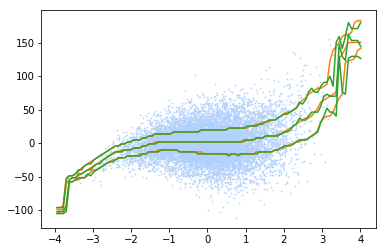

In [71]:
if gauss:
    q_gauss = np.array([y_[np.minimum(result_gauss[:,i].searchsorted(quantiles),m-1)] for i in range(n)])
    plt.plot(x_.T,q_gauss, color='C1')

if flat:
    q_flat = np.array([y_[np.minimum(result_flat[:,i].searchsorted(quantiles),m-1)] for i in range(n)])
    plt.plot(x_.T,q_flat, color='C2')
    
plt.scatter(x,y, color='xkcd:powder blue', s=0.5);